# Выявление определяющих успешность игры закономерностей

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
data.duplicated().unique()

array([False])

### Вывод
Данные изучены. Видим пропуски, неверный тип данных в Year_of_Release и User_Score, явных дубликатов нет.

## Подготовка данных

Для начала приведём название столбцов к нижнему регистру

In [6]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Изменим типы данных в year_of_release и user_score

In [7]:
data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'] = data['year_of_release'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
len(data[data['user_score']=='tbd'])

2424

В столбце user_score помимо 6.7к+ строк с пропусками, видим ещё 2.4к строк со значениями tbd. Это значит, что в момент выгрузки данных оценка пользователей находилась в процессе формирования и не была определена. Заменим tbd на пустые, т.к. для нас это то же самое. И изменим тип данных на float.

In [10]:
data.loc[data['user_score']=='tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [11]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [12]:
data[data['user_score']==0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,NaN,0.0,E


Очень стало любопытно что за игра с оценкой 0. My Little Pony: Pinkie Pie's Party! Проверил на metacritic - действительно игра так себе)

In [13]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [14]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Для столбца rating для большей читаемости создадим дополнительный столбец, который будет обозначать возрастные категории рейгтинга. Данные берём из википедии.
<br>
E: 0+
<br>
M: 17+
<br>
T: 13+
<br>
E10+: 10+
<br>
K-A: 0+
<br>
A0: 18+
<br>
EC: 3+
<br>
RP: оставим как есть
<br>
пустые: заменим на заглушки 'N/A'

In [15]:
def rating_age_category(row):
    if row['rating']=='E' or row['rating']=='K-A':
        return '0+'
    elif row['rating']=='M':
        return '17+'
    elif row['rating']=='T':
        return '13+'
    elif row['rating']=='E10+':
        return '10+'
    elif row['rating']=='AO':
        return '18+'
    elif row['rating']=='EC':
        return '3+'
    elif row['rating']=='RP':
        return 'RP'

Так же, заменим пустые значения в столбцах оценок критиков и юзеров на заглуки "-1". В дальнейшем просто не включим их в графики, но будет понимание сколько таких значений, при построении сводных таблиц

In [16]:
data['rating_age_category'] = data.apply(rating_age_category,axis=1)
data['rating_age_category'] = data['rating_age_category'].fillna('N/A')
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_age_category
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,0+
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN,N/A
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,0+
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,0+
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN,N/A


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 16713 non-null  object 
 1   platform             16715 non-null  object 
 2   year_of_release      16715 non-null  int64  
 3   genre                16713 non-null  object 
 4   na_sales             16715 non-null  float64
 5   eu_sales             16715 non-null  float64
 6   jp_sales             16715 non-null  float64
 7   other_sales          16715 non-null  float64
 8   critic_score         16715 non-null  float64
 9   user_score           16715 non-null  float64
 10  rating               9949 non-null   object 
 11  rating_age_category  16715 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


Вернёмся к пропускам. В столбцах name и  genre по 2 пропуска, что несущественно, а в столбцах с оценками и рейтингом пропусков плюс-минус половина датафрейма. В данном случае, считаю правильным решением оставить пропуски и не заполнять их. Заполнение почти половины датафрейма средними/медианными значениями, пускай даже в рамках жанра или ещё каких-то атрибутов, - некорректно. Это исказит данные при анализе.  По названию, платформе, году релиза, жанру и продажам невозможно корректно определить оценки критиков/юзеров и возрастной рейтинг - нужно более грубокое погружение в каждую игру. Поэтому, оставляем поля пустыми.
<br>
Пропуски могли появится либо из-за того что игру не оценили и у неё просто не было оценки, либо неправильно запарсили с ресурса с исходными данными

Посчитаем суммарные продажи для каждой игры среди всех регионов

In [18]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 16713 non-null  object 
 1   platform             16715 non-null  object 
 2   year_of_release      16715 non-null  int64  
 3   genre                16713 non-null  object 
 4   na_sales             16715 non-null  float64
 5   eu_sales             16715 non-null  float64
 6   jp_sales             16715 non-null  float64
 7   other_sales          16715 non-null  float64
 8   critic_score         16715 non-null  float64
 9   user_score           16715 non-null  float64
 10  rating               9949 non-null   object 
 11  rating_age_category  16715 non-null  object 
 12  total_sales          16715 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.7+ MB


### Вывод
Предобработали данные для анализа. Привели названия столбов к нижнему регистру, поменяли тип данных на требуемые, обработали столбец с рейтингом и добавили дополнительный, который наглядно расшифровывает возарстные ограничения для каждого рейтинга. Пустые строки в оценках и рейтинге оставили пустыми, потому что по представленным даннам невозможно корректно их заполнить, чтобы при анализе данные не исказились.

## Анализ данных

Посмотрим сколько игр выпускалось в разные годы

In [19]:
#напишем вспомогательную функцию, чтобы подписывать графики
def plot_title_labels(title,xlabel,ylabel):
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel) 
    None

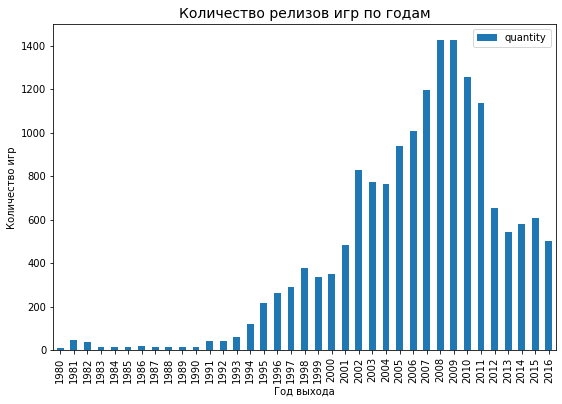

In [20]:
year_release = data.pivot_table(index='year_of_release' ,values='name',aggfunc='count').reset_index().rename(columns = {'name':'quantity'})
year_release.query('year_of_release>0').plot(kind='bar', x='year_of_release' , y='quantity',figsize=(9,6))
plot_title_labels('Количество релизов игр по годам','Год выхода','Количество игр')

Видим скачок по выпуску игр после 94-го года, плавный рост, потом резкий скачок после 2000-го, пик в 2008 и 2009 и после 2009-го спад. До 94ого года выпускалось меньше игр, относительно периода после 94-го года. Важны ли данные до 94-ого или нет - будем определять на конкретной исследовательской задаче, пока ничего не отрубаем.

Посмотрим суммарные продажи игр по годам

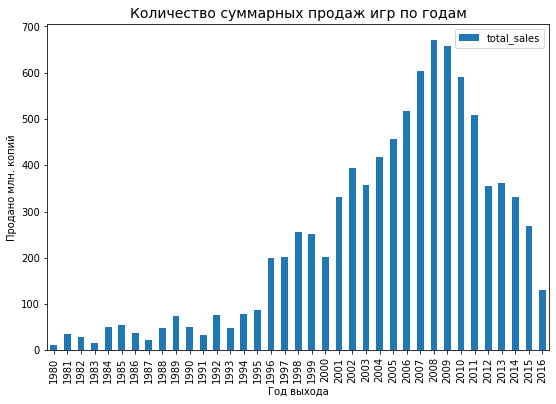

In [21]:
year_release = data.pivot_table(index='year_of_release' ,values='total_sales',aggfunc='sum').reset_index()
year_release.query('year_of_release>0').plot(kind='bar', x='year_of_release' , y='total_sales',figsize=(9,6))
plot_title_labels('Количество суммарных продаж игр по годам','Год выхода','Продано млн. копий')

Распределение почти идентично количеству релизов

Посмотрим как менялись продажи по платформам

In [22]:
sales_by_platform = data.pivot_table(index='platform', values='total_sales',aggfunc='sum').sort_values(by='total_sales' , ascending = False).reset_index()
sales_by_platform

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Первая шестёрка платформ в 2 и более раз обгоняет по продажам остальные. Построим распределение по годам и посмотрим как менялись продажи для каждой из этих платформ

In [23]:
sales_by_platform_per_year = data.pivot_table(index=['platform','year_of_release'], values='total_sales',aggfunc='sum').reset_index()
sales_by_platform_per_year

,platform,year_of_release,total_sales
0,2600,0,10.50
1,2600,1980,11.38
2,2600,1981,35.68
3,2600,1982,28.88
4,2600,1983,5.84
...,...,...,...
249,XB,2008,0.18
250,XOne,2013,18.96
251,XOne,2014,54.07
252,XOne,2015,60.14


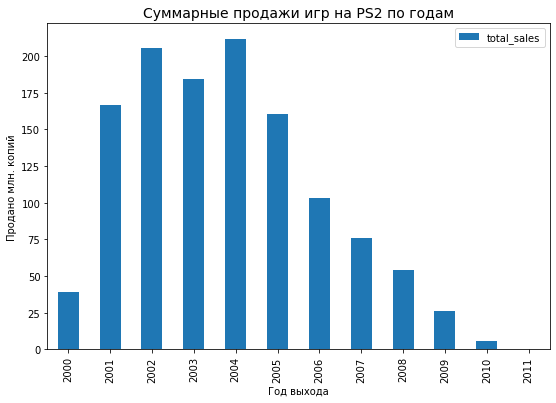

In [24]:
sales_by_platform_per_year.query('platform=="PS2" & year_of_release>0').plot(kind='bar', x='year_of_release' , y='total_sales',figsize=(9,6))
plot_title_labels('Суммарные продажи игр на PS2 по годам','Год выхода','Продано млн. копий')

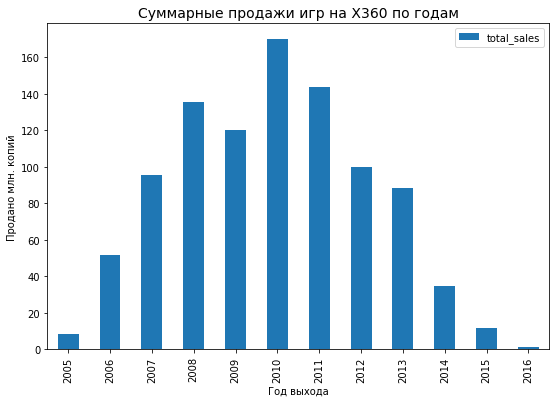

In [25]:
sales_by_platform_per_year.query('platform=="X360" & year_of_release>0').plot(kind='bar', x='year_of_release' , y='total_sales',figsize=(9,6))
plot_title_labels('Суммарные продажи игр на X360 по годам','Год выхода','Продано млн. копий')

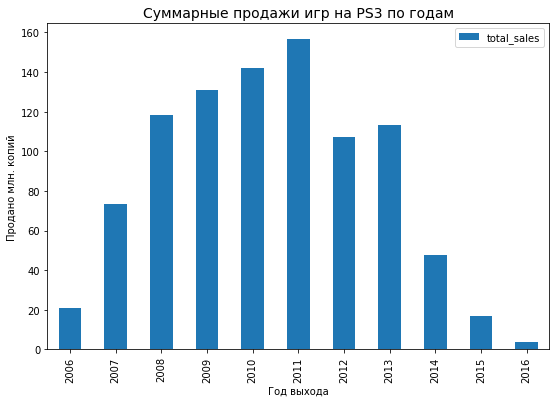

In [26]:
sales_by_platform_per_year.query('platform=="PS3" & year_of_release>0').plot(kind='bar', x='year_of_release' , y='total_sales',figsize=(9,6))
plot_title_labels('Суммарные продажи игр на PS3 по годам','Год выхода','Продано млн. копий')

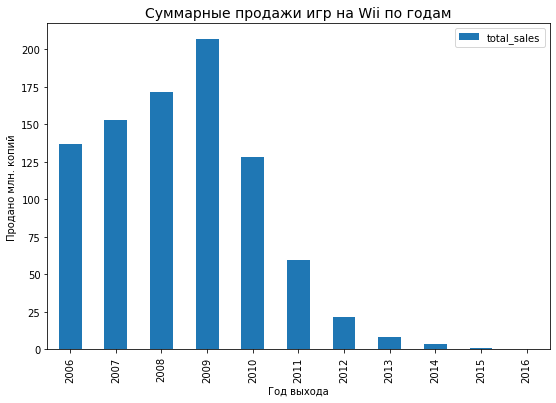

In [27]:
sales_by_platform_per_year.query('platform=="Wii" & year_of_release>0').plot(kind='bar', x='year_of_release' , y='total_sales',figsize=(9,6))
plot_title_labels('Суммарные продажи игр на Wii по годам','Год выхода','Продано млн. копий')

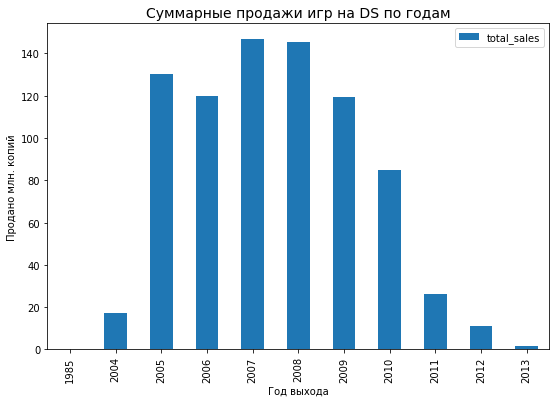

In [28]:
sales_by_platform_per_year.query('platform=="DS" & year_of_release>0').plot(kind='bar', x='year_of_release' , y='total_sales',figsize=(9,6))
plot_title_labels('Суммарные продажи игр на DS по годам','Год выхода','Продано млн. копий')

In [29]:
data.query('platform=="DS" & year_of_release==1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_age_category,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,NaN,N/A,0.02


Обнаружили один выброс для 1985 года. Явно опечатка, но оценить общие продажи он нам не мешает, поэтому оставляем.

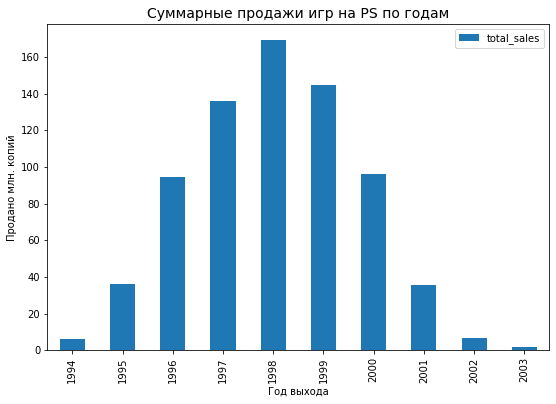

In [30]:
sales_by_platform_per_year.query('platform=="PS" & year_of_release>0').plot(kind='bar', x='year_of_release' , y='total_sales',figsize=(9,6))
plot_title_labels('Суммарные продажи игр на PS по годам','Год выхода','Продано млн. копий')

По представленным графикам видно, что, в среднем, через 6 лет выходит следующее поколение платформы

Посмотрим для проверки продажи PS4

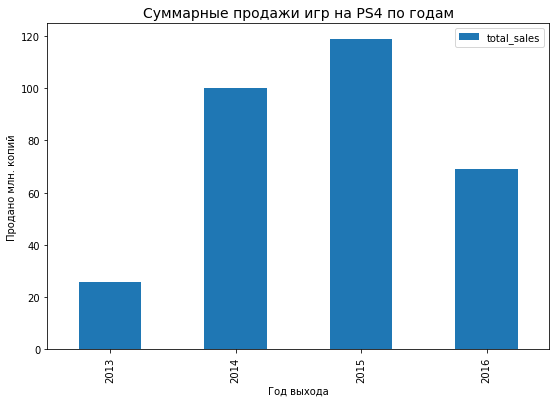

In [31]:
sales_by_platform_per_year.query('platform=="PS4" & year_of_release>0').plot(kind='bar', x='year_of_release' , y='total_sales',figsize=(9,6))
plot_title_labels('Суммарные продажи игр на PS4 по годам','Год выхода','Продано млн. копий')

Даты выхода консолей Playstation: 1994,2000,2006,2013. Сходится

Сделаем срез данных по актуальному периоду, чтобы построить прогноз на 2017 год. Из графиков по суммарным продажам и релизам по годам видно, что данные за период 2012-2016 более-менее в одних пределах находятся, плюс 2012/2013 - как раз годы выхода нового(текущего) поколения консолей. Но т.к. сейчас декадрь 2016, то можно предположить что многие компании ещё не отчитались о продажах своих игр. Поэтому, возьмём срез с 2012 по 2015 годы.

In [32]:
data_actual = data.query('year_of_release>=2012 & year_of_release<2016')
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2384 entries, 16 to 16707
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 2384 non-null   object 
 1   platform             2384 non-null   object 
 2   year_of_release      2384 non-null   int64  
 3   genre                2384 non-null   object 
 4   na_sales             2384 non-null   float64
 5   eu_sales             2384 non-null   float64
 6   jp_sales             2384 non-null   float64
 7   other_sales          2384 non-null   float64
 8   critic_score         2384 non-null   float64
 9   user_score           2384 non-null   float64
 10  rating               1331 non-null   object 
 11  rating_age_category  2384 non-null   object 
 12  total_sales          2384 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 260.8+ KB


Посмотрим, какие платформы лидируют по продажам

In [33]:
sales_by_platform_actual = data_actual.pivot_table(index='platform', values='total_sales',aggfunc='sum').sort_values(by='total_sales' , ascending = False).reset_index()
sales_by_platform_actual

,platform,total_sales
0,PS3,285.19
1,PS4,244.89
2,X360,235.02
3,3DS,179.47
4,XOne,133.17
5,WiiU,77.59
6,PC,57.40
7,PSV,44.93
8,Wii,35.19
9,DS,12.55


Видим топ-5 выбивающихся по продажам платформ. Посмотрим как по ним себя ведут продажи: растут или падают 

In [34]:
sales_by_platform_per_year_actual = data_actual.pivot_table(index=['platform','year_of_release'], values='total_sales',aggfunc='sum').reset_index()

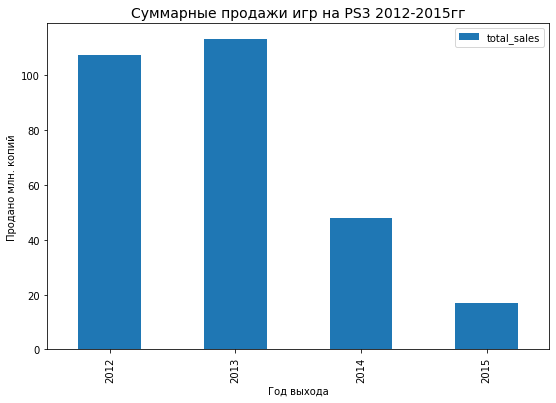

In [35]:
sales_by_platform_per_year_actual.query('platform=="PS3"').plot(kind='bar', x='year_of_release' , y='total_sales',figsize=(9,6))
plot_title_labels('Суммарные продажи игр на PS3 2012-2015гг','Год выхода','Продано млн. копий')

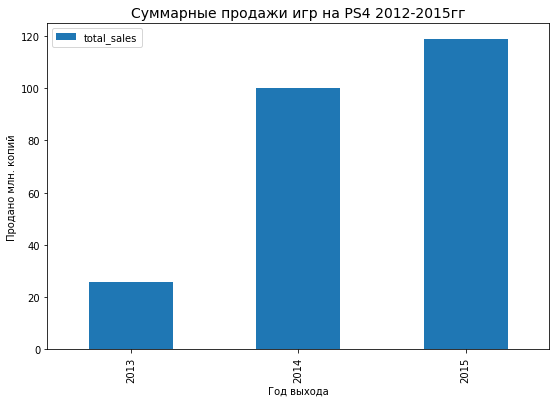

In [36]:
sales_by_platform_per_year_actual.query('platform=="PS4"').plot(kind='bar', x='year_of_release' , y='total_sales',figsize=(9,6))
plot_title_labels('Суммарные продажи игр на PS4 2012-2015гг','Год выхода','Продано млн. копий')

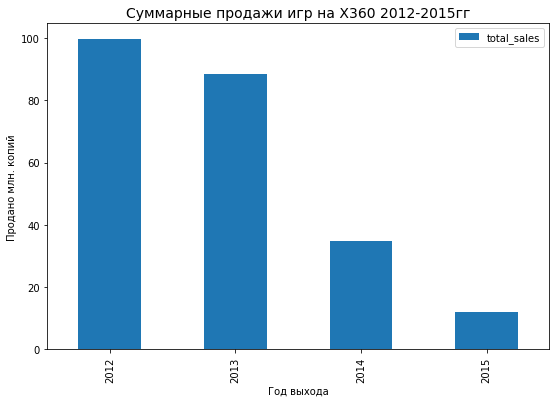

In [37]:
sales_by_platform_per_year_actual.query('platform=="X360"').plot(kind='bar', x='year_of_release' , y='total_sales',figsize=(9,6))
plot_title_labels('Суммарные продажи игр на X360 2012-2015гг','Год выхода','Продано млн. копий')

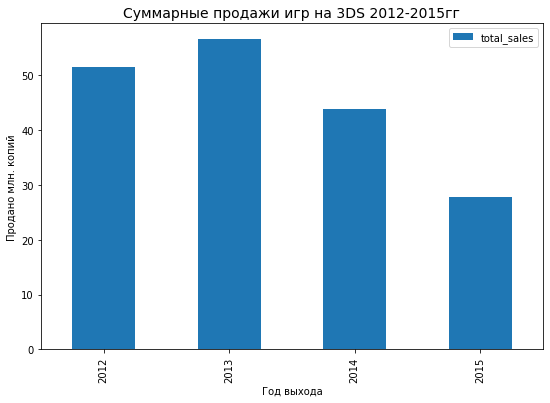

In [38]:
sales_by_platform_per_year_actual.query('platform=="3DS"').plot(kind='bar', x='year_of_release' , y='total_sales',figsize=(9,6))
plot_title_labels('Суммарные продажи игр на 3DS 2012-2015гг','Год выхода','Продано млн. копий')

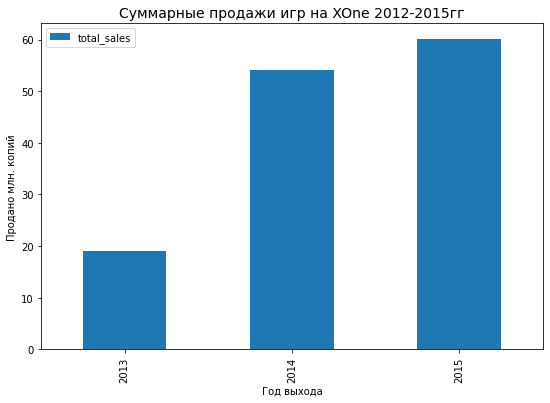

In [39]:
sales_by_platform_per_year_actual.query('platform=="XOne"').plot(kind='bar', x='year_of_release' , y='total_sales',figsize=(9,6))
plot_title_labels('Суммарные продажи игр на XOne 2012-2015гг','Год выхода','Продано млн. копий')

Видим, что продажи PS3 и X360 - падают, а продажи PS4 и XOne - растут. Что логично, новое поколение консолей сменило старое. Продажи платформы 3DS так же падают, но их суммарное количество за акутальный период всё ещё внушительное. Опять же, если знать специфику игр 3DS, можно предположить что продажи сильно скошены в сторону азиатского региона, поэтому данные по общим продажам рассматривать не совсем корректно.
<br>
Выбираем 2 платформы как потенциально прибыльные для массового потребителя - PS4 и XOne.

Построим диаграмму размаха по глобальным продажам игр для этих двух платформ. Так же, добавим третью платформу для сравнения - 3DS

count    228.000000
mean       1.074079
std        1.899788
min        0.010000
25%        0.097500
50%        0.310000
75%        1.105000
max       14.630000
Name: total_sales, dtype: float64

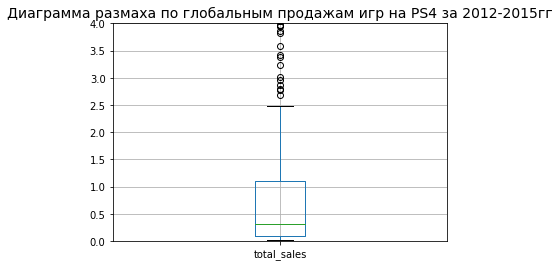

In [40]:
data_actual.query('platform=="PS4"').boxplot(column='total_sales')
plt.title('Диаграмма размаха по глобальным продажам игр на PS4 за 2012-2015гг',fontsize=14)
None
plt.ylim(0,4)
data_actual.query('platform=="PS4"')['total_sales'].describe()

count    160.000000
mean       0.832313
std        1.182243
min        0.010000
25%        0.130000
50%        0.350000
75%        1.137500
max        7.390000
Name: total_sales, dtype: float64

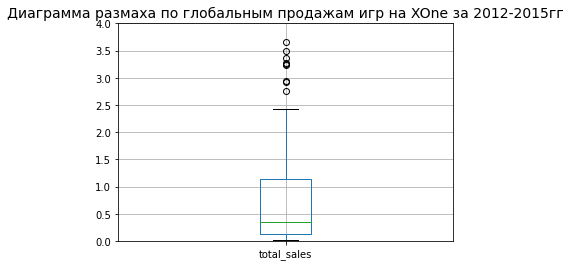

In [41]:
data_actual.query('platform=="XOne"').boxplot(column='total_sales')
plt.title('Диаграмма размаха по глобальным продажам игр на XOne за 2012-2015гг',fontsize=14)
None
plt.ylim(0,4)
data_actual.query('platform=="XOne"')['total_sales'].describe()

count    350.000000
mean       0.512771
std        1.424582
min        0.010000
25%        0.050000
50%        0.115000
75%        0.330000
max       14.600000
Name: total_sales, dtype: float64

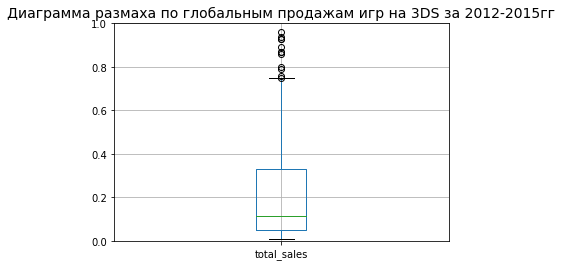

In [42]:
data_actual.query('platform=="3DS"').boxplot(column='total_sales')
plt.title('Диаграмма размаха по глобальным продажам игр на 3DS за 2012-2015гг',fontsize=14)
None
plt.ylim(0,1)
data_actual.query('platform=="3DS"')['total_sales'].describe()

По данным диаграммам можно сказать, что для PS4 нормальными продажами являются от 97.5тыс до 1105 тыс копий. Можем считать продажи меньше 97.5к - неудачными релизами, а свыше 1105к до ~2500к - удачными. Продажи свыше 2500к копий определяются как выбросы, считаем что это абсолютные хиты.
<br>
Для Xone нормальными продажами являются от 130тыс до 1137 тыс копий. Можем считать продажи меньше 130к - неудачными релизами, а свыше 1137к до ~2400к - удачными. Продажи свыше 2400к - абсолютные хиты.
<br>
Для 3DS нормальными продажами являются от 50тыс до 330 тыс копий. Можем считать продажи меньше 50к - неудачными релизами, а свыше 330к до ~750к - удачными. Продажи свыше 750к - абсолютные хиты.

Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

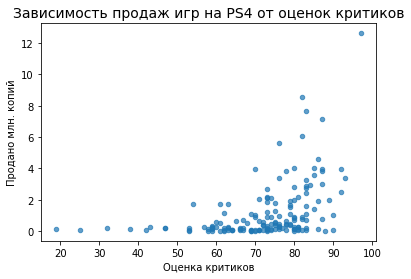

In [43]:
data_actual.query('platform=="PS4" & critic_score>0').plot(kind='scatter' , x=['critic_score'] , y='total_sales', alpha=0.7)
plot_title_labels('Зависимость продаж игр на PS4 от оценок критиков','Оценка критиков','Продано млн. копий')

Не очень наглядно. Попробуем категоризировать и построить более наглядный график

In [44]:
data_actual['critic_score_cat'] = (data_actual['critic_score']/10).round()
data_actual['user_score_cat'] = data_actual['user_score'].round()

Корреляция оценок критиков и продаж игр на PS4: 0.4318482049982005


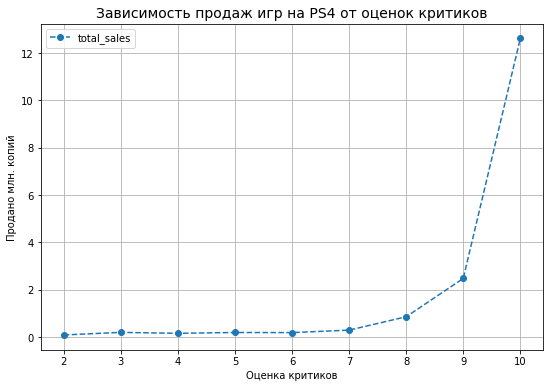

In [45]:
data_actual.query('platform=="PS4" & critic_score_cat>0').pivot_table(index='critic_score_cat',values='total_sales',aggfunc='median').plot(style='o--', figsize=(9, 6), grid=True)
plot_title_labels('Зависимость продаж игр на PS4 от оценок критиков','Оценка критиков','Продано млн. копий')
print('Корреляция оценок критиков и продаж игр на PS4:', data_actual.query('platform=="PS4" & critic_score>0')['critic_score'].corr(data_actual.query('platform=="PS4"')['total_sales']))

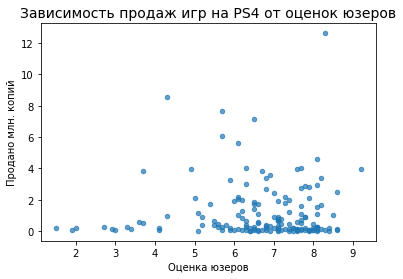

In [46]:
data_actual.query('platform=="PS4" & user_score>0').plot(kind='scatter' , x=['user_score'] , y='total_sales', alpha=0.7)
plot_title_labels('Зависимость продаж игр на PS4 от оценок юзеров','Оценка юзеров','Продано млн. копий')

Корреляция оценок юзеров и продаж игр на PS4: 0.024230832360622557


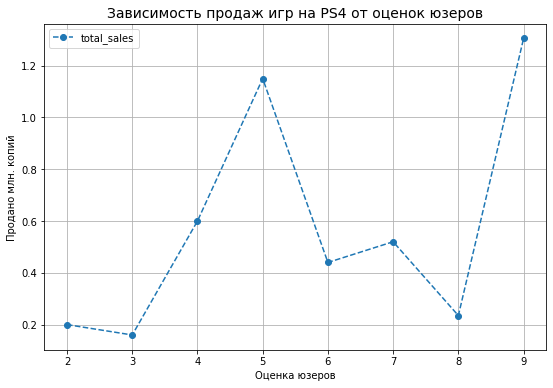

In [47]:
data_actual.query('platform=="PS4" & user_score_cat>0').pivot_table(index='user_score_cat',values='total_sales',aggfunc='median').plot(style='o--', figsize=(9, 6), grid=True)
plot_title_labels('Зависимость продаж игр на PS4 от оценок юзеров','Оценка юзеров','Продано млн. копий')
print('Корреляция оценок юзеров и продаж игр на PS4:', data_actual.query('platform=="PS4" & user_score>0')['user_score'].corr(data_actual.query('platform=="PS4"')['total_sales']))

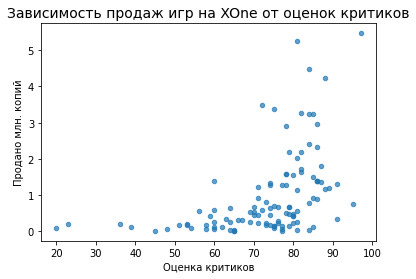

In [48]:
data_actual.query('platform=="XOne" & critic_score>0').plot(kind='scatter' , x=['critic_score'] , y='total_sales', alpha=0.7)
plot_title_labels('Зависимость продаж игр на XOne от оценок критиков','Оценка критиков','Продано млн. копий')

Корреляция оценок критиков и продаж игр на XOne: 0.45938456807071054


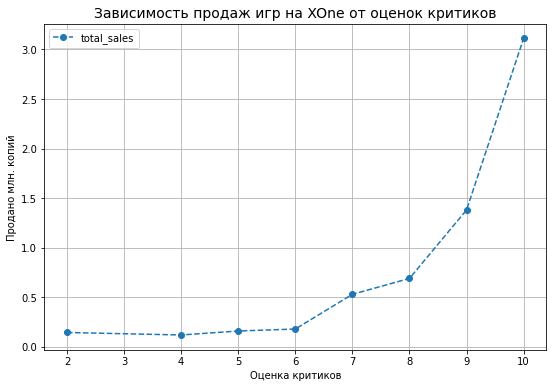

In [49]:
data_actual.query('platform=="XOne" & critic_score_cat>0').pivot_table(index='critic_score_cat',values='total_sales',aggfunc='median').plot(style='o--', figsize=(9, 6), grid=True)
plot_title_labels('Зависимость продаж игр на XOne от оценок критиков','Оценка критиков','Продано млн. копий')
print('Корреляция оценок критиков и продаж игр на XOne:', data_actual.query('platform=="XOne" & critic_score>0')['critic_score'].corr(data_actual.query('platform=="XOne"')['total_sales']))

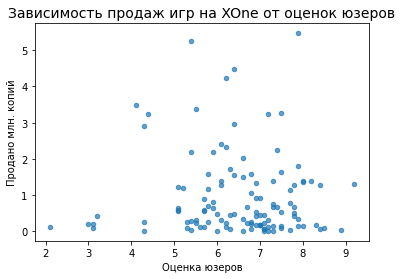

In [50]:
data_actual.query('platform=="XOne" & user_score>0').plot(kind='scatter' , x=['user_score'] , y='total_sales', alpha=0.7)
plot_title_labels('Зависимость продаж игр на XOne от оценок юзеров','Оценка юзеров','Продано млн. копий')

Корреляция оценок юзеров и продаж игр на XOne: -0.03926828544552199


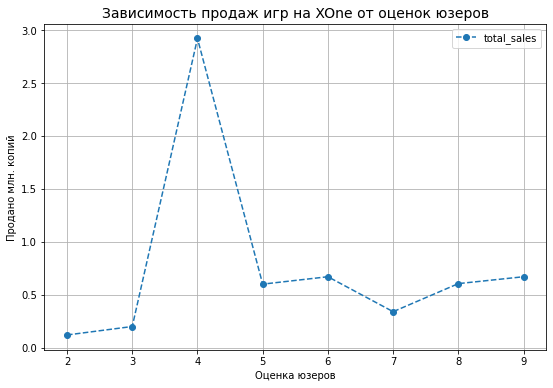

In [51]:
data_actual.query('platform=="XOne" & user_score_cat>0').pivot_table(index='user_score_cat',values='total_sales',aggfunc='median').plot(style='o--', figsize=(9, 6), grid=True)
plot_title_labels('Зависимость продаж игр на XOne от оценок юзеров','Оценка юзеров','Продано млн. копий')
print('Корреляция оценок юзеров и продаж игр на XOne:', data_actual.query('platform=="XOne" & user_score>0')['user_score'].corr(data_actual.query('platform=="XOne"')['total_sales']))

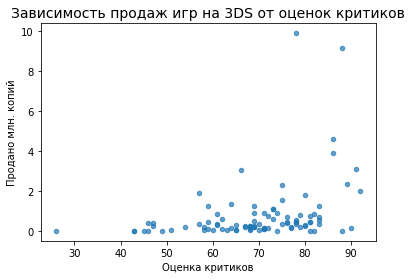

In [52]:
data_actual.query('platform=="3DS" & critic_score>0').plot(kind='scatter' , x=['critic_score'] , y='total_sales', alpha=0.7)
plot_title_labels('Зависимость продаж игр на 3DS от оценок критиков','Оценка критиков','Продано млн. копий')

Корреляция оценок критиков и продаж игр на 3DS: 0.3331477996346886


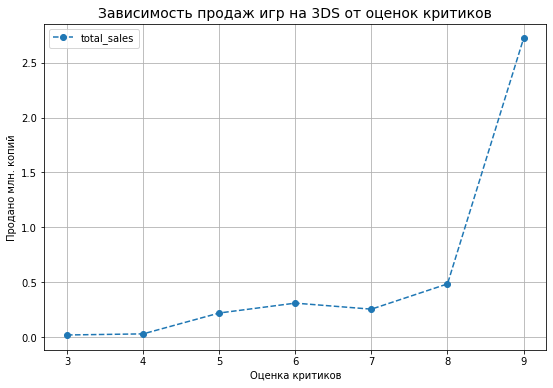

In [53]:
data_actual.query('platform=="3DS" & critic_score_cat>0').pivot_table(index='critic_score_cat',values='total_sales',aggfunc='median').plot(style='o--', figsize=(9, 6), grid=True)
plot_title_labels('Зависимость продаж игр на 3DS от оценок критиков','Оценка критиков','Продано млн. копий')
print('Корреляция оценок критиков и продаж игр на 3DS:', data_actual.query('platform=="3DS" & critic_score>0')['critic_score'].corr(data_actual.query('platform=="3DS"')['total_sales']))

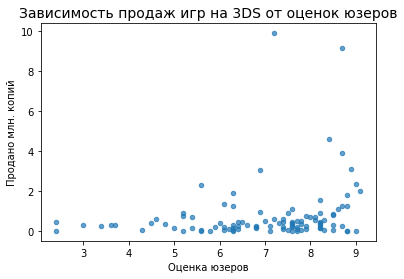

In [54]:
data_actual.query('platform=="3DS" & user_score>0').plot(kind='scatter' , x=['user_score'] , y='total_sales', alpha=0.7)
plot_title_labels('Зависимость продаж игр на 3DS от оценок юзеров','Оценка юзеров','Продано млн. копий')

Корреляция оценок юзеров и продаж игр на 3DS: 0.21056681222463666


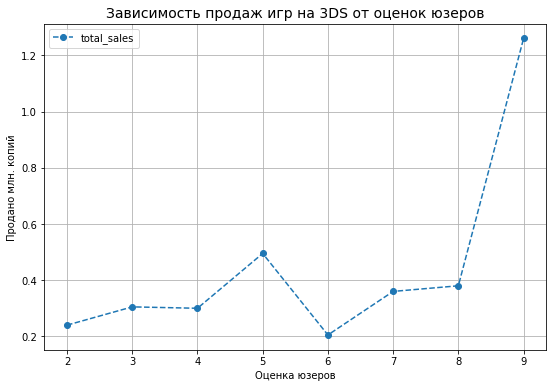

In [55]:
data_actual.query('platform=="3DS" & user_score_cat>0').pivot_table(index='user_score_cat',values='total_sales',aggfunc='median').plot(style='o--', figsize=(9, 6), grid=True)
plot_title_labels('Зависимость продаж игр на 3DS от оценок юзеров','Оценка юзеров','Продано млн. копий')
print('Корреляция оценок юзеров и продаж игр на 3DS:', data_actual.query('platform=="3DS" & user_score>0')['user_score'].corr(data_actual.query('platform=="3DS"')['total_sales']))

По графикам и корреляции хорошо видно, что оценки критиков существенно влияют на продажи игр, а оценки юзеров - нет

Далее, посмотрим на распределение продажи игр по жанрам

In [56]:
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_age_category,total_sales,critic_score_cat,user_score_cat
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,17+,21.05,10.0,8.0
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,17+,16.27,10.0,8.0
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,NaN,N/A,14.63,-0.0,-1.0
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,NaN,N/A,14.60,-0.0,-1.0
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,17+,13.79,8.0,5.0


In [57]:
data_actual_sales_by_genre = data_actual.pivot_table(index = 'genre', values = 'total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
data_actual_sales_by_genre

,genre,total_sales
0,Action,411.01
1,Shooter,266.51
2,Role-Playing,174.62
3,Sports,157.58
4,Misc,82.44
5,Platform,57.77
6,Racing,50.71
7,Fighting,40.02
8,Simulation,33.23
9,Adventure,25.61


Можно смело утверждать, что Action - самый популярный жанр. Так же, довольно неплохо продаются игры жанра Shooter, Role-Playing и Sports. Паззлы чувствуют себя совсем плохо.

Ради интереса, посмотрим на продажи по жанрам за все годы

In [58]:
data_sales_by_genre = data.pivot_table(index = 'genre', values = 'total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
data_sales_by_genre

,genre,total_sales
0,Action,1744.17
1,Sports,1331.27
2,Shooter,1052.45
3,Role-Playing,934.56
4,Platform,827.77
5,Misc,802.51
6,Racing,728.67
7,Fighting,447.53
8,Simulation,389.97
9,Puzzle,242.57


Примерно то же самое, но паззлы раньше любили чуть больше
<br>
Топ-5 самых прибыльных жанров по суммарным продажам: Action, Shooter, Role-Playing, Sports, Misc	

Попробуем посмотреть медианные и средние продажи для определения самых прибыльных жанров

In [59]:
data_actual.pivot_table(index = 'genre', values = 'total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False).reset_index()

,genre,total_sales
0,Shooter,0.525
1,Sports,0.305
2,Platform,0.285
3,Racing,0.230
4,Misc,0.180
5,Fighting,0.160
6,Role-Playing,0.150
7,Simulation,0.150
8,Action,0.140
9,Strategy,0.080


In [60]:
data_actual.pivot_table(index = 'genre', values = 'total_sales', aggfunc='mean').sort_values(by='total_sales', ascending=False).reset_index()

,genre,total_sales
0,Shooter,1.417606
1,Platform,0.825286
2,Sports,0.716273
3,Racing,0.557253
4,Role-Playing,0.552595
5,Simulation,0.535968
6,Misc,0.515250
7,Action,0.481841
8,Fighting,0.430323
9,Strategy,0.210517


Можно утверждать, что топ-3 самых прибыльных жанра это: Shooter, Sports, Platform, из которых Shooter - самый прибыльный

### Вывод
Довольно резкий  рост по количеству выпускаемых игр начался после 1994 года, спад – после 2009. Пик по количеству выпущенных  игр пришёлся на  2008 и 2009 год. Самая популярная платформа за всё время по продаже игр – PS2. Определили, что , в среднем, раз в 6 лет выходит новая платформа. Определили актуальный период  данных для его анализа и прогнозирования на 2017год (2012-2015). Выяснили, что на данный момент самые перспективные платформы – PS4 и XOne. Оценки критиков существенно влияют на продажи игр, а пользователей – нет. Самый продаваемый жанр – это Action, а самый непродаваемый – Puzzle.

## Портрет пользователя каждого региона

Определим для пользователей каждого региона топ-5 самых популярных платформ

In [61]:
data_actual.pivot_table(index = 'platform' , values ='na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending=False).reset_index()

,platform,na_sales
0,X360,139.36
1,PS3,102.71
2,PS4,87.25
3,XOne,78.85
4,3DS,51.17
5,WiiU,36.00
6,PC,17.76
7,Wii,17.39
8,PSV,10.83
9,DS,4.59


In [62]:
data_actual.pivot_table(index = 'platform' , values ='eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending=False).reset_index()

,platform,eu_sales
0,PS4,109.31
1,PS3,105.60
2,X360,73.81
3,XOne,41.96
4,3DS,40.31
5,PC,34.23
6,WiiU,23.65
7,Wii,11.81
8,PSV,10.97
9,DS,3.53


In [63]:
data_actual.pivot_table(index = 'platform' , values ='jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending=False).reset_index()

,platform,jp_sales
0,3DS,79.76
1,PS3,33.99
2,PSV,17.48
3,WiiU,12.34
4,PSP,10.47
5,PS4,10.22
6,DS,3.72
7,Wii,3.39
8,X360,1.57
9,XOne,0.33


In [64]:
data_actual.pivot_table(index = 'platform' , values ='other_sales', aggfunc = 'sum').sort_values(by='other_sales', ascending=False).reset_index()

,platform,other_sales
0,PS3,42.89
1,PS4,38.11
2,X360,20.28
3,XOne,12.03
4,3DS,8.23
5,PSV,5.65
6,WiiU,5.60
7,PC,5.41
8,Wii,2.60
9,DS,0.71


Рынки всего мира, кроме Японского, очень похожи. В топ-5 входят платформы PS3, PS4, X360, XOne и 3DS. В Америке больше популярен Xbox, в Европе и других странах - Playstation. В other_sales более популярна PS3 из-за более низкой цены, видимо.
<br>
В японии топ-5 выглядит так: 3DS, PS3, PSV, WiiU, PSP. Все 5 платформ от двух Японских компаний, причём 3 из 5 платформ - портативные. В Японии свой нишевый рынок.

Определим для пользователей каждого региона топ-5 самых популярных жанров

In [65]:
data_actual.pivot_table(index = 'genre' , values ='na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending=False).reset_index()

,genre,na_sales
0,Action,168.55
1,Shooter,128.53
2,Sports,73.99
3,Role-Playing,58.11
4,Misc,37.43
5,Platform,24.09
6,Fighting,17.95
7,Racing,16.49
8,Adventure,7.97
9,Simulation,7.81


In [66]:
data_actual.pivot_table(index = 'genre' , values ='eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending=False).reset_index()

,genre,eu_sales
0,Action,148.66
1,Shooter,97.57
2,Sports,57.08
3,Role-Playing,44.25
4,Misc,25.66
5,Racing,25.52
6,Platform,20.02
7,Simulation,13.28
8,Fighting,9.45
9,Adventure,8.14


In [67]:
data_actual.pivot_table(index = 'genre' , values ='jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending=False).reset_index()

,genre,jp_sales
0,Role-Playing,58.83
1,Action,45.73
2,Misc,11.82
3,Simulation,10.08
4,Fighting,8.69
5,Platform,8.52
6,Shooter,8.17
7,Sports,7.09
8,Adventure,7.06
9,Strategy,2.65


In [68]:
data_actual.pivot_table(index = 'genre' , values ='other_sales', aggfunc = 'sum').sort_values(by='other_sales', ascending=False).reset_index()

,genre,other_sales
0,Action,48.07
1,Shooter,32.24
2,Sports,19.42
3,Role-Playing,13.43
4,Misc,7.53
5,Racing,6.21
6,Platform,5.14
7,Fighting,3.93
8,Adventure,2.44
9,Simulation,2.06


Топ-5 для все стран, кроме Японии: Action, Shooter, Sports, Role-Playing, Misc. Для Японии: Role-Playing, Action, Misc, Simulation, Fighting. Скорее всего, разница в менталитете потребителей Азии и Европы/Америки.

Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе

In [69]:
data_actual.pivot_table(index = 'rating_age_category' , values ='na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending=False).reset_index()

,rating_age_category,na_sales
0,17+,215.90
1,0+,106.40
2,N/A,94.78
3,10+,71.89
4,13+,57.07


In [70]:
data_actual.pivot_table(index = 'rating_age_category' , values ='eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending=False).reset_index()

,rating_age_category,eu_sales
0,17+,177.42
1,0+,99.42
2,N/A,84.03
3,10+,51.56
4,13+,43.17


In [71]:
data_actual.pivot_table(index = 'rating_age_category' , values ='other_sales', aggfunc = 'sum').sort_values(by='other_sales', ascending=False).reset_index()

,rating_age_category,other_sales
0,17+,58.44
1,0+,28.35
2,N/A,24.89
3,10+,15.17
4,13+,14.83


In [72]:
data_actual.pivot_table(index = 'rating_age_category' , values ='jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending=False).reset_index()

,rating_age_category,jp_sales
0,N/A,94.52
1,0+,27.26
2,13+,23.75
3,17+,20.00
4,10+,7.74


В Японии большинство проданных игр без рейтинга вообще. Связано это может быть с тем, что ESRB - рейтинговая система изначально для Северной Америки. В Японии явно не стремятся получить этот рейтинг и он на продажи никак не влияет. В Америке и других странах игр без рейтинга довольно много, но большая часть с рейтингом.

### Вывод
Рынок Японии сильно отличается от рынка Америки,Европы и других стран. Различия в топ-5 популярных платформ, в топ-5 популярных жанров и в количестве продаж относительно возрастного рейтинга - я Японии большая часть проданных игр без рейтинга ESRB.

## Проверка гипотез

Проверим гипотезу: "средние пользовательские рейтинги платформ Xbox One и PC одинаковые"
<br>
Нулевую гипотезу формулируем так: средний пользовательский рейтинг платформы Xbox One равен среднему пользователькому рейтингу платформы PC. Альтернативная гипотеза: средний пользовательский рейтинг платформы Xbox One больше среднего пользователького рейтинга платформы PC. Для проверки используем t-test c критерием проверки о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, т.к. имеем две независимые выборки и хотим сравнить равно ли выборочное среднее одной выборке выборочному среднему другой.

In [73]:
#при проверке гипотезы для нахождения p-value среди двух выборок локально прибьём столбцы с NaN
sample_1 = data_actual[data_actual['platform']=='XOne']['user_score'].dropna()
sample_2 = data_actual[data_actual['platform']=='PC']['user_score'].dropna()
results = st.ttest_ind(sample_1, sample_2)
alpha = 0.05
print('p-value равно:', results.pvalue)
print('уровень доверия равен:', alpha)
if results.pvalue < alpha:
      print("Отвергаем нулевую гипотезу")
else:
      print("Не получилось отвергнуть нулевую гипотезу")

p-value равно: 0.04821774683433214
уровень доверия равен: 0.05
Отвергаем нулевую гипотезу


Принимаем нулевую гипотезу как рабочую

Проверим гипотезу: средние пользовательские рейтинги жанров Action и Sports разные
<br>
Нулевую гипотезу формулируем так: средний пользовательский рейтинг жанра Action равен среднему пользователькому рейтингу жанра Sports. Альтернативная гипотеза: средний пользовательский рейтинг жанра Sports меньше среднего пользователького рейтинга жанра Action. Для проверки используем аналогичный предыдущей гипотезе t-test по тем же причинам

In [74]:
sample_3 = data_actual[data_actual['genre']=='Action']['user_score'].dropna()
sample_4 = data_actual[data_actual['genre']=='Sports']['user_score'].dropna()
results_2 = st.ttest_ind(sample_3, sample_4)
alpha = 0.05
print('p-value равно:', results_2.pvalue)
print('уровень доверия равен:', alpha)
if results_2.pvalue < alpha:
      print("Отвергаем нулевую гипотезу")
else:
      print("Не получилось отвергнуть нулевую гипотезу")

p-value равно: 0.04067672901087169
уровень доверия равен: 0.05
Отвергаем нулевую гипотезу


Проверим альтернативную гипотезу. Для этого использем t-test для проверки односторонней гипотезы, т.к. нам нужно определить меньше ли выборочное среднее одной выборки выборочного среднего другой.

In [75]:
result_3 = st.ttest_1samp(
    sample_4, 
    sample_3.mean())
print('p-value равно:', result_3.pvalue / 2)
print('уровень доверия равен:', alpha)
if (result_3.pvalue / 2 < alpha) and (sample_3.mean() < sample_4.mean()):
    print("Отвергаем альтернативную гипотезу")
else:
    print("Не получилось отвергнуть альтернативную гипотезу")

p-value равно: 0.0030744685098628606
уровень доверия равен: 0.05
Отвергаем альтернативную гипотезу


Принимаем альтернативную гипотезу как рабочую

### Вывод
После проверки гипотез получили следующие результаты: средние пользовательские рейтинги платформ Xbox One и PC одинаковые, средний пользовательский рейтинг жанра Action больше среднего пользовательского рейтинга жанра Sports

## Общий вывод

В данном проекте мы попытались выявить определяющие факторы успешной игры с точки зрения её продажи.
<br>
Изучили данные из представленного датасета, предобработали их для последующего анализа: привели данные к нужным типам, категоризировали возрастные рейтинги в более читаемые.
<br>
В ходе анализа выяснили, что после 2009 года пошёл спад выпускаемых игр, самая популяраня платформа по продажам игр - PS2, новое поколение платформ сменяет старое, в среднем, раз в 6 лет. Самые перспективные с точки зрения роста продаж платформы на данный момент - PS4 и XOne. Оценки критиков существенно влияют на продажи игр,  а оценки пользователей - нет. Самый продаваемый в мире жанр - Action, самый непопулярный - Puzzle.
<br>
Рынок Японии сильно отличается от рынка Америки,Европы и других стран - к нему нужен особой подход.
<br>
Проверили поставленные гипотезы и установили: средние пользовательские рейтинги платформ Xbox One и PC одинаковые, средний пользовательский рейтинг жанра Action больше среднего пользовательского рейтинга жанра Sports